In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
from src.metrics import *
from settings import *
from src.data import generate

instruments = ['Guitar']
instruments_aug = ['Accordion', 'Violin', 'Piano']

# from setup_logging import setup_logging
# setup_logging()

#generate.my_run(instruments)
datasets_raw = [pd.read_pickle(os.path.join(METADATA_DIR_PROCESSED, f'data_{instrument.lower()}.pkl')) for instrument in instruments]
datasets_augmented = [pd.read_pickle(os.path.join(METADATA_DIR_AUGMENTED_RAW, f'data_{instrument.lower()}.pkl')) for instrument in instruments_aug]

2023-05-19 10:28:33.824521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 10:28:33.958977: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-19 10:28:34.572838: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.0: cannot open shared object file: No such file or directory
2023-05-19 10:28:34.572904: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64]

In [2]:
from src.data.preprocessing import get_max_shape
max_spectrogram_size = max(map(lambda df: get_max_shape(df), datasets_raw+datasets_augmented))
max_spectrogram_size

from src.data.preprocessing import uniform_shape
uniform = lambda df: uniform_shape(df, max_spectrogram_size)

datasets_raw = list(map(uniform,datasets_raw))
datasets_augmented = list(map(uniform,datasets_augmented))
datasets_augmented = list(map(lambda df: df[['spectrogram','class_ID', 'class_name','augmentation']],datasets_augmented))
datasets_augmented = list(map(lambda df: df.reset_index(drop=True), datasets_augmented))

In [3]:
import numpy as np
spectrograms_raw = [[x for x in dataset['spectrogram']] for dataset in datasets_raw]
spectrograms_augmented = [[x for x in dataset['spectrogram']] for dataset in datasets_augmented]
all_spectrograms = np.concatenate(spectrograms_raw + spectrograms_augmented)

all_spectrograms_flattened = all_spectrograms.flatten()

In [4]:
all_spectrograms.shape

(4700, 128, 107)

In [6]:
curr_shape = all_spectrograms.shape
all_spectrograms_squashed = all_spectrograms.reshape(curr_shape[0]*curr_shape[1], curr_shape[2])

In [7]:
all_spectrograms_squashed.shape

(601600, 107)

In [9]:
all_spectrograms_squashed[:,0].shape

(601600,)

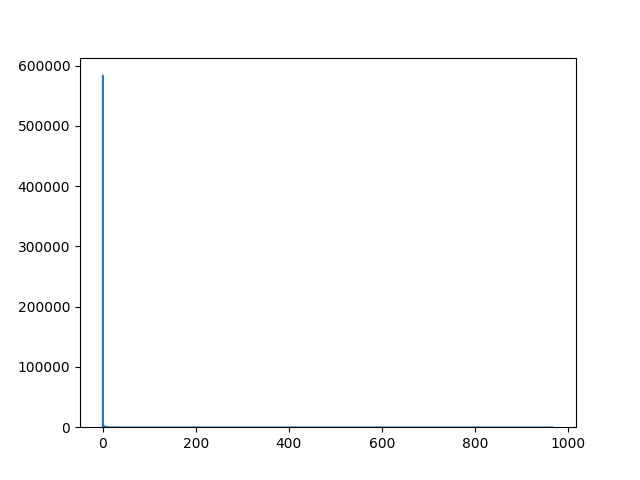

In [11]:
import matplotlib.pyplot as plt
%matplotlib ipympl

plt.figure()
plt.hist(all_spectrograms_squashed[:,0], bins=1000,histtype='step')
plt.show()

968.3179931640625
1.4088530084899568e-10
0.0038697879327053777


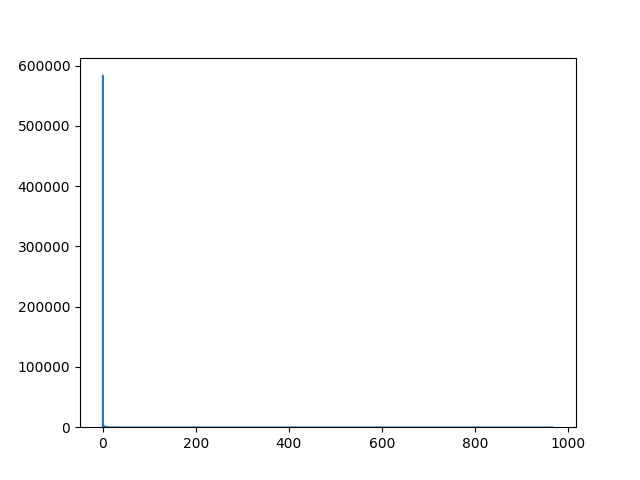

In [13]:
from scipy.stats import boxcox
from scipy.stats import boxcox_normmax

col = all_spectrograms_squashed[:,0]

print(max(col))

opt_lmbda = boxcox_normmax(col + 1)

#all_spectrograms_positive = list(filter(lambda x: x > 0, all_spectrograms_flattened))
col_transformed = boxcox(x=col + 1, lmbda=opt_lmbda)

print(min(col_transformed))
print(max(col_transformed))
#all_spectrograms_transformed = np.log(all_spectrograms_flattened + 1e-4)

plt.figure()

plt.clf()
plt.hist(col, bins=1000,histtype='step')
plt.show()

In [97]:
all_spectrograms_positive = list(filter(lambda x: x > 0, all_spectrograms_flattened))




In [90]:
opt

0.028139130828503025

In [98]:
opt_1

-37015.423461872844